## Install system dependencies

In [2]:
from huggingface_hub import login
login()

In [3]:
# in Colab, in a code cell:
%%bash
pip install -q bitsandbytes accelerate peft
pip install -q 'automatikz[pdf] @ git+https://github.com/potamides/AutomaTikZ'
apt-get update -qq && apt-get install -y -qq \
    texlive-latex-extra lmodern ghostscript poppler-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 23.0 MB/s eta 0:00:00
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package fonts-lat

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.6.1 which is incompatible.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from automatikz.infer import TikzGenerator, load

bnb = BitsAndBytesConfig(
  load_in_4bit=True,
  bnb_4bit_quant_type="nf4",
  bnb_4bit_compute_dtype="float16"
)
# laoding 13 B text-only CLiMA adapter (CLiMA13b)
model, tokenizer = load(
  "nllg/tikz-clima-13b",
  quantization_config=bnb,
  device_map="auto"
)
generate = TikzGenerator(model, tokenizer, stream=False)

`get_file_from_repo` is deprecated and will be removed in version 4.51. Use `cached_file` instead.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/470 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

You are using a model of type llama to instantiate a model of type clima. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/bnb.py:355: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(
Device set to use cuda:0


In [33]:
# 3. Generate a TikZ program
caption = "A multi-layer perceptron with two hidden layers."
tikzdoc = generate(caption)

# 4. Save the raw .tex
tikzdoc.save("mlp.tex")

\documentclass[11pt]{article}
\usepackage{amsmath,amssymb,amsthm}
\usepackage{color}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{tikz-cd}
\usetikzlibrary{calc}
\usetikzlibrary{patterns}
\usepackage[bookmarks=true,colorlinks=true,linkcolor=blue,urlcolor=blue,citecolor=blue,pdfstartview=FitH]{hyperref}

\begin{document}

\begin{tikzpicture}[scale=0.8]
 \node at (0,0) {$(i)$};
 \node at (3,0) {$(ii)$};
 \node at (6,0) {$(iii)$};
 \node at (9,0) {$(iv)$};
 \draw[->,thick] (0.5,0.1) to [out=60,in=120] (2.5,0.1);
 \draw[->,thick] (3.5,0.1) to [out=60,in=120] (5.5,0.1);
 \draw[->,thick] (7.5,0.1) to [out=60,in=120] (9.5,0.1);
 \draw[->,thick] (-1,-0.4) to [out=30,in=150] (1.5,-0.4);
 \node[above] at (-1,-0.4) {$(i')$};
 \node[above] at (1.5,-0.4) {$(ii')$};
 \draw[<-,thick] (0.5,-0.5) to [out=30,in=210] (2.5,-0.5);
 \draw[<-,thick] (3.5,-0.5) to [out=30,in=210] (5.5,-0.5);
 \draw[<-,thick] (7.5,-0.5) to [out=30,in=210] (9.5,-0.5);
 \node[below] at (0.5,-0.5) {$(xii)$};
 \

KeyboardInterrupt: 

## Load dataset

In [65]:
from  datasets  import  load_dataset
ds = load_dataset("nllg/datikz-v3", split="test[:50]")

In [66]:
from tqdm.auto import tqdm
predictions = []
references  = []
caps = []

for ex in tqdm(ds, desc="Generating TikZ", total=len(ds)):
    fig = generate(ex["caption"])
    predictions.append(fig.code)
    references.append(ex["code"])
    caps.append(ex["caption"])

Generating TikZ:   0%|          | 0/50 [00:00<?, ?it/s]

In [67]:
print(len(predictions))

50


In [43]:
print(ds[1]["caption"])

External economies of agglomeration as experience by a firm through a shift in the production function due to an increase in the size of a city ($N$ to $N'$).


In [44]:
print(predictions[1])

\documentclass[12pt,a4paper]{article}
\usepackage[T1]{fontenc}
\usepackage{amsmath}
\usepackage{tikz}
\usepackage{amssymb}
\usetikzlibrary{decorations.pathmorphing}

\begin{document}

\begin{tikzpicture}[scale=0.4]

\draw[thick,->] (0,0)--(10,0) node[anchor=north west] {$N$};
\draw[thick,->] (0,0)--(0,10) node[anchor=south east] {$P$};

\draw[thick,dashed] (0,6) node[anchor=east]{$P_0$}--(9,6);
\draw[thick,dashed] (3,0) node[anchor=north]{$N_0$}--(3,9);

\draw[thick] (0,6).. controls (3,5) and (4,4).. (6,2);
\draw[thick] (6,2).. controls (7,1) and (8,0.5).. (9,0.1);

\node at (1,4) {$\Delta T$};
\node at (4,2) {$\Delta N$};
\node at (8,0.5) {$\Delta S$};
\node at (6,-1) {};

\draw[thick] (0,6).. controls (3,7) and (5,8).. (7,8);
\draw[thick] (7,8).. controls (8,9) and (9,9).. (9,9);

\draw[thick,dashed] (0,9) node[anchor=east]{$P_1$}--(9,9);
\draw[thick,dashed] (9,0) node[anchor=north]{$N_1$}--(9,9);

\node at (1,8.2) {$\Delta T$};
\node at (4,8) {$\Delta N$};
\node at (8,9.1) {$\Delta

In [45]:
print(references[1])

\documentclass{article}
\usepackage{tikz}

\begin{document}

\begin{tikzpicture}(10,0)
\draw (0,0)--(8,0) node[right]{$k$}; 
\node [below] at (5,-0.1) {Input (capital per worker)};
\draw(0,0)--(0,8) node[right]{$y$};
\node [align=left, left] at (-0.2,7) {Output\\ per worker};
\draw(0,0) ..controls (3,5) and (8,5) .. (8,5) node[above]{$y=G(N)f(k)$};
\draw(0,0) ..controls (4,7) and (8,7) .. (8,7) node[above]{$y=G(N')f(k)$};
\end{tikzpicture}

\end{document}


## BLEU score

In [14]:
!pip install crystalbleu evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


In [68]:
import evaluate

references_new = [[r] for r in references]

# 3) Load and compute BLEU
bleu = evaluate.load("bleu")
bleu_results = bleu.compute(
    predictions=predictions,
    references=references_new,
)

print(f"BLEU score: {bleu_results['bleu']:.4f}")


BLEU score: 0.0542


## Get crystalbleu score

In [16]:
!pip install -q crystalbleu

In [70]:
# 2) Import
from crystalbleu import corpus_bleu

# 3) Prepare your references exactly the same way you did for BLEU:
#    a list of 1-element lists of strings
references_cb = [[r] for r in references]

# 4) Call CrystalBLEU
#    - `ignoring={}` means “don’t drop any trivial tokens”
#    - `n=4` uses up to 4-gram overlap (the default)
cb_score = corpus_bleu(
    references_cb,   # List[List[str]]
    predictions,     # List[str]
    ignoring={},     # or supply a dict of common tokens to ignore
)

print(f"CrystalBLEU: {cb_score:.4f}")

CrystalBLEU: 0.0320


In [41]:
!sudo apt-get update
!sudo apt-get install -y texlive-latex-base texlive-latex-extra texlive-pictures poppler-utils!
!pip install pdf2image

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,848 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,696 kB]
Fetched 11.6 MB in 3s (3,408 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/So

In [71]:
import os
import subprocess
import tempfile
from pdf2image import convert_from_path
from PIL import Image

def compile_tikz_to_image(tikz_code: str, dpi: int = 300) -> Image.Image:
    """
    Compile a TikZ code snippet or full .tex document to a PIL Image.

    If `tikz_code` starts with a `\documentclass` declaration, it's treated as a
    complete LaTeX document. Otherwise, it is wrapped in a minimal standalone TikZ
    document. The function runs `pdflatex` to generate a PDF and converts the first
    page to a PNG image using `pdf2image`.
    """
    # Determine if this is a full document or snippet
    if tikz_code.lstrip().startswith(r"\documentclass"):
        full_tex = tikz_code
    else:
        full_tex = (
            "\\documentclass[tikz,border=2pt]{standalone}\n"
            "\\usepackage{tikz}\n"
            "\\begin{document}\n"
            f"{tikz_code}\n"
            "\\end{document}"
        )
    try:
        with tempfile.TemporaryDirectory() as tmpdir:
            tex_path = os.path.join(tmpdir, "compiled.tex")
            with open(tex_path, "w") as f:
                f.write(full_tex)

            # Compile to PDF silently
            subprocess.run(
                ["pdflatex", "-halt-on-error", tex_path],
                cwd=tmpdir,
                stdout=subprocess.DEVNULL,
                stderr=subprocess.DEVNULL,
                check=True
            )

            # Convert PDF -> PIL Image
            pdf_path = os.path.join(tmpdir, "compiled.pdf")
            pages = convert_from_path(pdf_path, dpi=dpi)
            return pages[0]
    except subprocess.CalledProcessError as e:
        print(f"[compile warning] pdflatex failed: {e}")
    except Exception as e:
        print(f"[compile warning] conversion error: {e}")

    # On failure, return None
    return None

In [73]:
compiled_figs = []
for code in tqdm(predictions, desc="Compiling TikZ to images"):
    img = compile_tikz_to_image(code, dpi=200)
    if img is not None:
        compiled_figs.append(img)
    else:
        # append a placeholder (e.g., blank white)
        compiled_figs.append(Image.new("RGB", (256, 256), "white"))

Compiling TikZ to images:   0%|          | 0/50 [00:00<?, ?it/s]

[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmpdr9p2le5/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmpaqs0ktt3/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmpfe1cyp2z/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmpq4sk1tki/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmp11d0yr0d/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmp7s11pqw2/compiled.tex']' returned non-zero exit status 1.
[compile warning] pdflatex failed: Command '['pdflatex', '-halt-on-error', '/tmp/tmp9lcj_mbm/compiled.tex']' returned non-zero exit status 1.
[compi

Total compiled images: 50



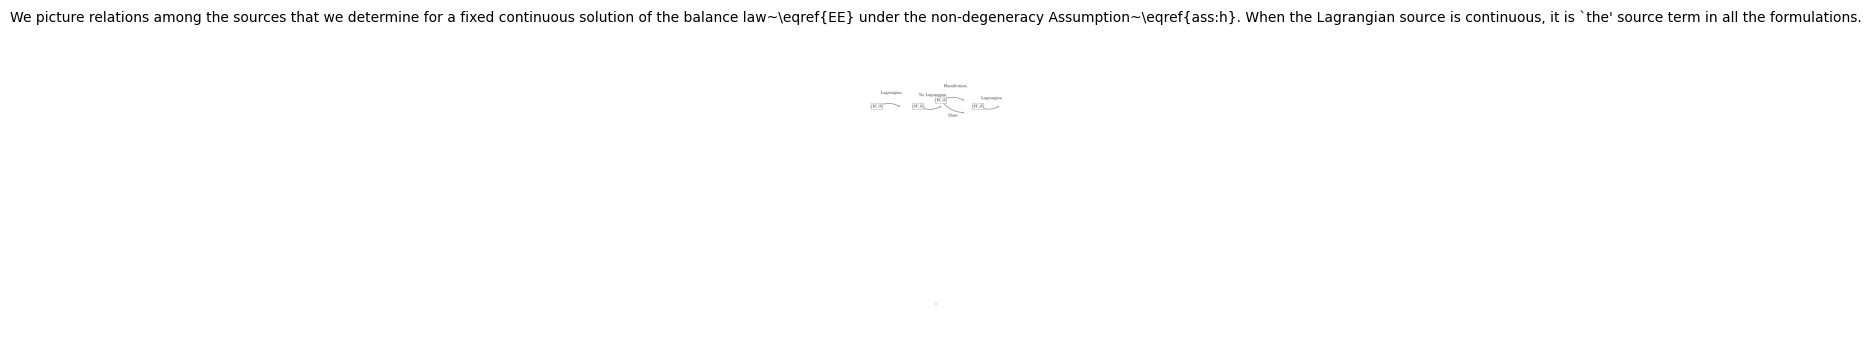

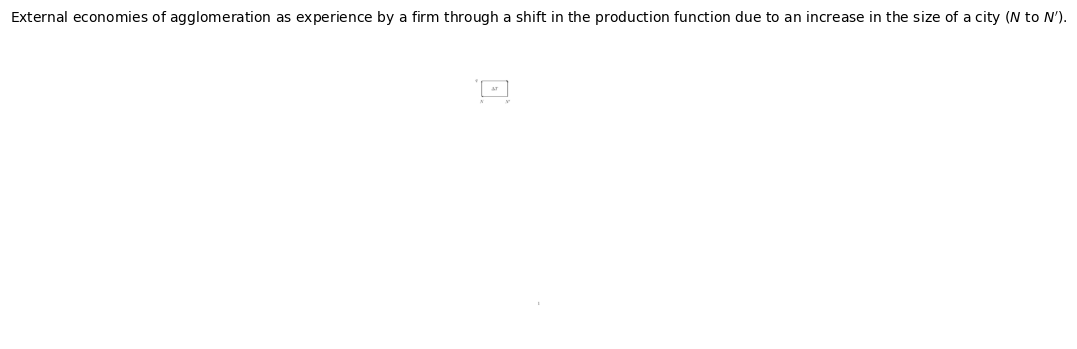

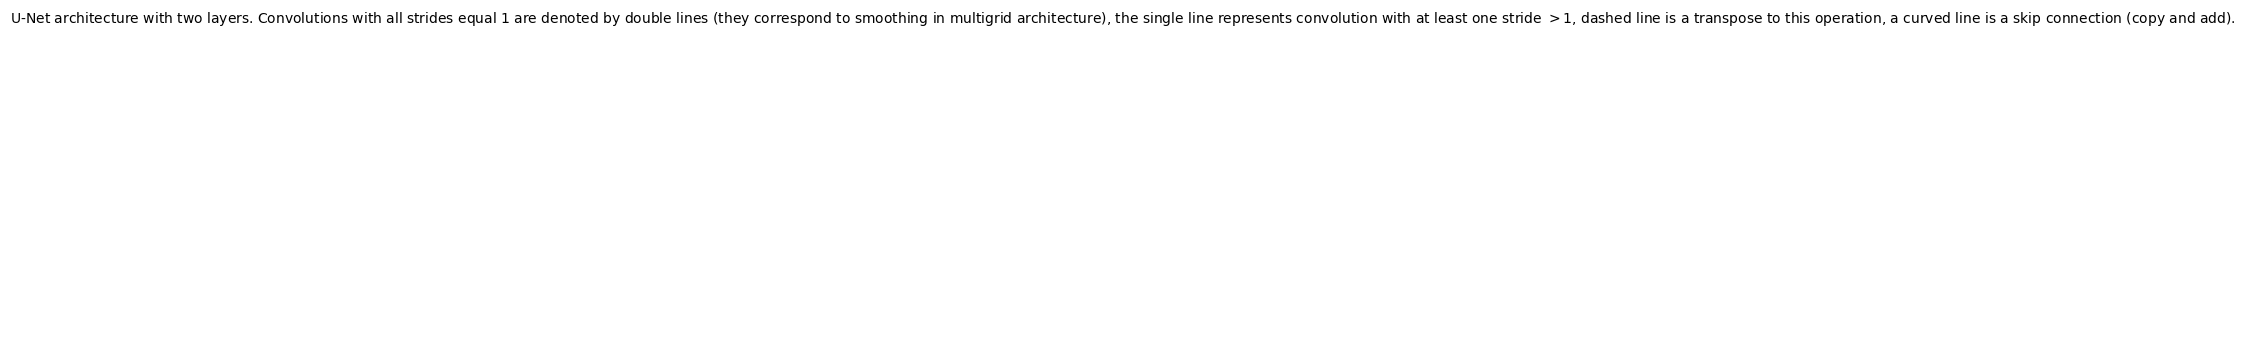

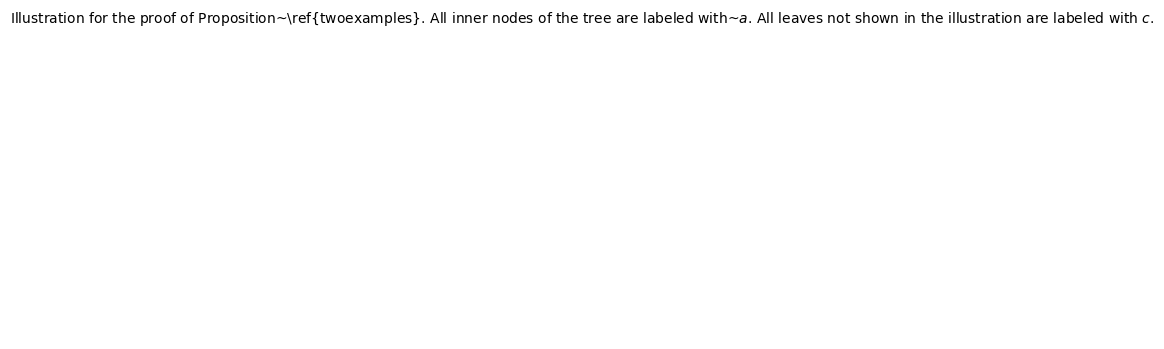

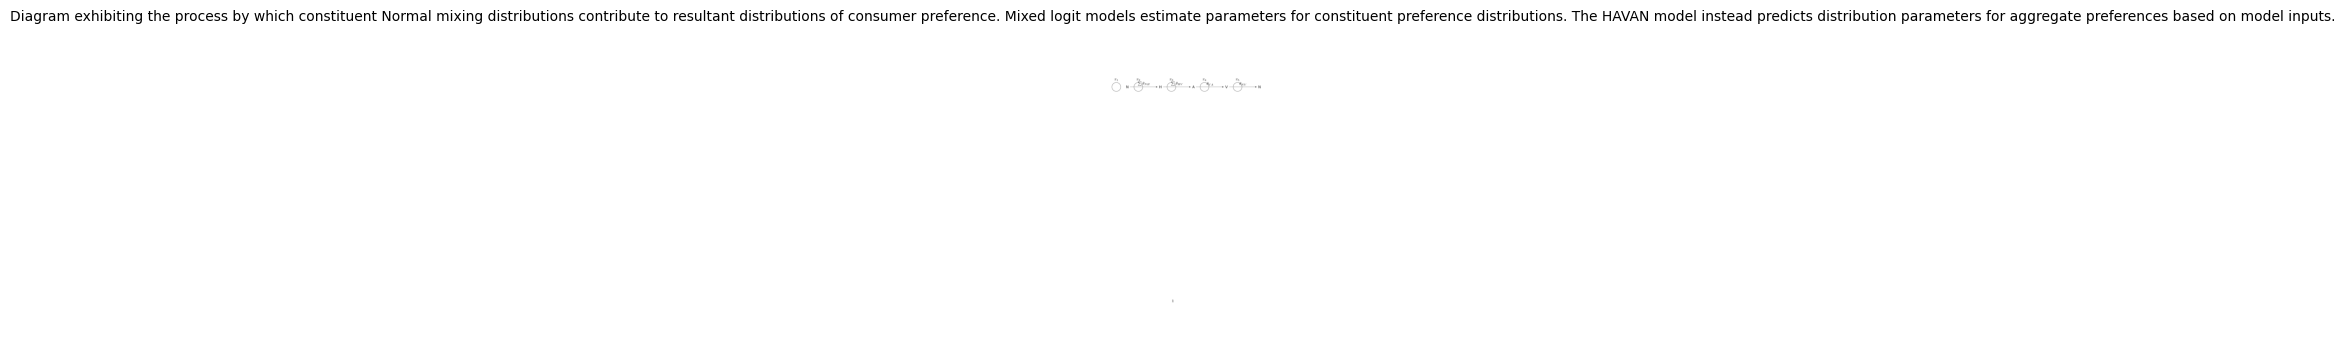

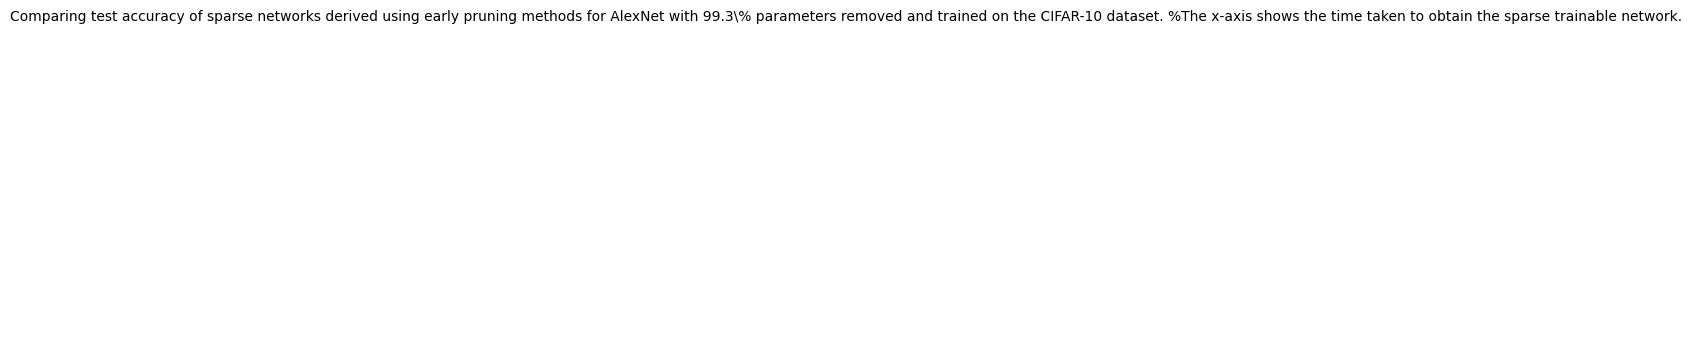

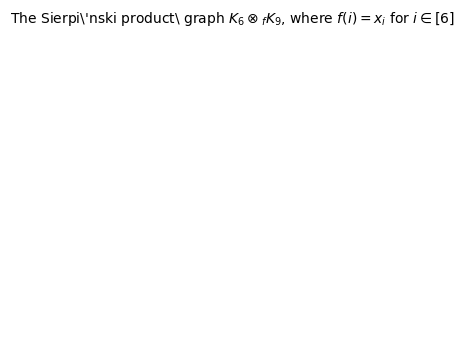

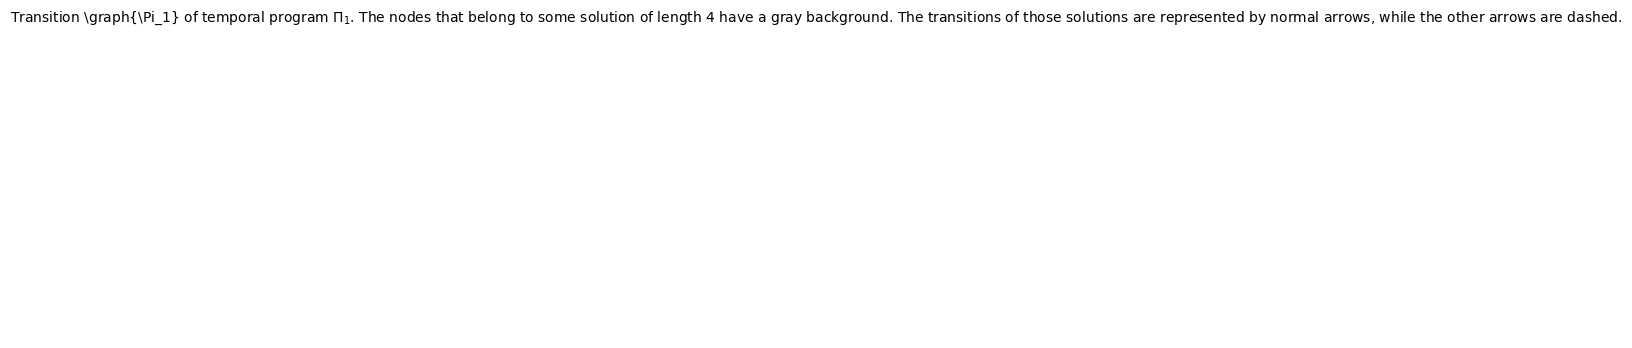

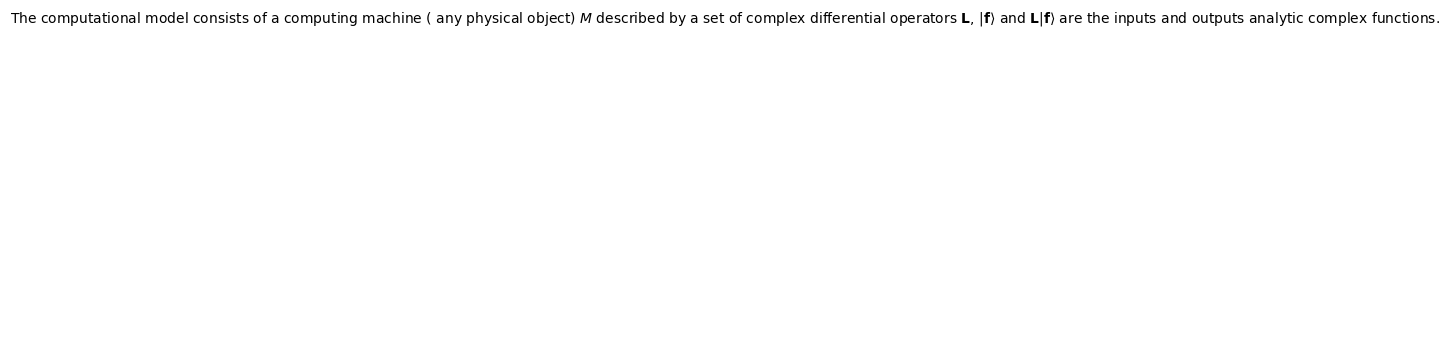

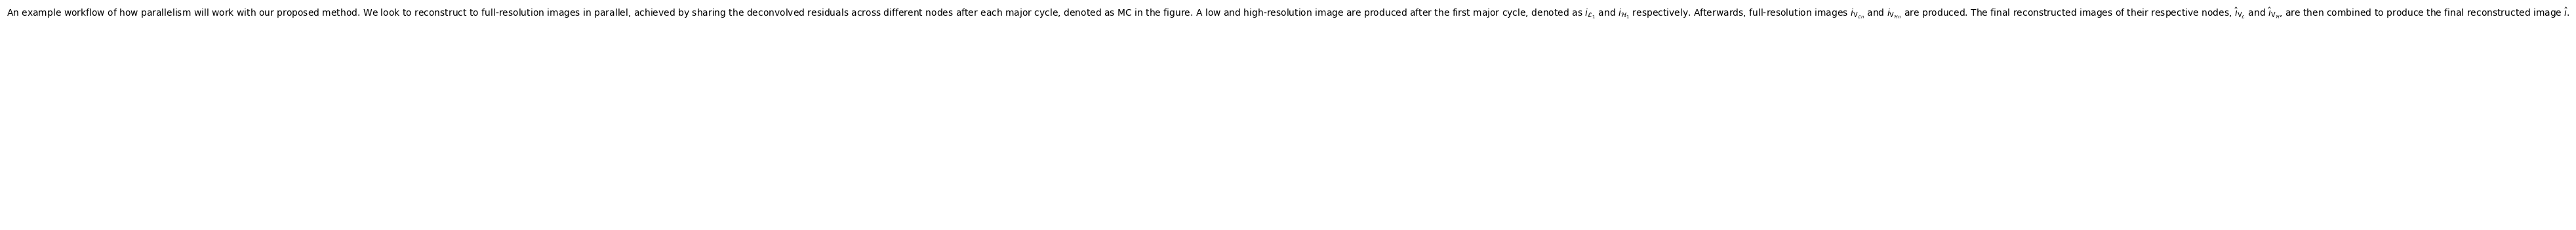

In [75]:
import matplotlib.pyplot as plt

print(f"Total compiled images: {len(compiled_figs)}\n")

# Display up to the first 3
for i in range(min(10, len(compiled_figs))):
    img = compiled_figs[i]
    caption = caps[i]

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(caption, fontsize=10)
    plt.show()

In [24]:
!pip install -q transformers

In [79]:
from transformers import CLIPProcessor, CLIPModel
import torch

# 3) Load the processor & model
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model     = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

# 4) Prepare your data
#    ‘texts’ is a list of your input captions (strings)
#    ‘images’ is a list of PIL.Image objects from `fig.rasterize()`
#    Make sure len(texts) == len(images)
inputs = processor(
    text=caps,
    images=compiled_figs,
    return_tensors="pt",
    padding=True,
    truncation=True,
    max_length=processor.tokenizer.model_max_length,
).to(device)

# 5) Forward pass & extract embeddings
with torch.no_grad():
    outputs     = model(**inputs)
    img_embeds  = outputs.image_embeds  # shape (batch, dim)
    text_embeds = outputs.text_embeds   # shape (batch, dim)

# 6) Normalize & compute cosine similarities
img_norm  = img_embeds  / img_embeds.norm(p=2, dim=1, keepdim=True)
text_norm = text_embeds / text_embeds.norm(p=2, dim=1, keepdim=True)

# similarity per example
sims = (img_norm * text_norm).sum(dim=1)  # tensor of shape (batch,)

# 7) Report the mean (i.e. the “CLIPScore”)
mean_sim = sims.mean().item()
print(f"Mean CLIPScore: {mean_sim:.4f}")

Mean CLIPScore: 0.2474
